# Theoretical Beta Spectra of $^{90}\rm Sr$/$^{90}\rm Y$ (Not used anymore)
Ref: https://academic.oup.com/ptps/article-lookup/doi/10.1143/PTPS.26.1

$$P(E) = C(E) F(Z,E) p E (Q - T)^2$$
$$F(Z,E)=\frac{2(1+S)}{\Gamma(1+2S)^2} (2pR_N)^{2(S-1)} e^{\pi\eta} |\Gamma(S+i\eta)|^2$$
* $R_N=A^{1/3}\times1.2\rm fm$
* $S=\sqrt{1-\alpha^2 Z^2}$
* $\eta = \frac{\alpha Z E}{p}$
* $Q(^{90}\rm Sr) = 0.546\rm MeV$
* $Q(^{90}\rm Y) = 2.28\rm MeV$
* $C(E)$ is the shape factor
    * $C(E) = 1$ for allowed decays
    * $C(E) = \frac{1}{12}[(E_0-E)^2+(E^2-1)]$ for unique 1st forbidden decays where $E_0 = 1+Q$ (approx. $\alpha Z\ll 1$)
    * Exact $C(E)$ for U1F is Eq.2 of https://link.aps.org/doi/10.1103/PhysRev.82.48

# Cs-137 $\gamma$ source
Ref: http://www.nucleide.org/DDEP_WG/Nuclides/Cs-137_tables.pdf<br>
$662~\rm keV$

## Response model
Use Poisson (asymptotically Gaussian) with excessive noise factor (ENF) $\gamma$
$$f_r(E,N_{pe}) = \frac{1}{\sqrt{2\pi N_{pe} \gamma}} \exp\left[-\frac{1}{2}\frac{(N_{pe}-E L_{y'})^2}{N_{pe}\gamma}\right]$$
where $L_{y'}$ is the gross light yield, which is equal to $L_y(1+K_{dup}) = \frac{L_y}{1-p}$ with $L_y$ being the true light yield and $p$ being the crosstalk probability. $p\simeq0.2$ at $5$ VoV.

Trigger efficiency model is
$$\varepsilon_{tr}(N_{pe}) = \frac{1}{2}\left[1+erf\left(\frac{N_{pe}-N_0}{B}\right)\right]$$


In [1]:
import numpy as np
import sipm.sipm as sipm
import sipm.dataset as ds
import sipm.beta as beta
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sipm.constants as const
plt.style.use('darkside')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
norm_sr90, _ = beta.beta_shape_norm(Q=const.Q_SR90, Z=const.Z_Y90, A=const.A_SR90, u1f=True)
norm_y90, _ = beta.beta_shape_norm(Q=const.Q_Y90, Z=const.Z_ZR90, A=const.A_SR90, u1f=True)
print('norm_sr90={} norm_y90={}'.format(norm_sr90,norm_y90))

norm_sr90=6004718046792.3545 norm_y90=2.056512394298567e+16


(1e-06, 0.1)

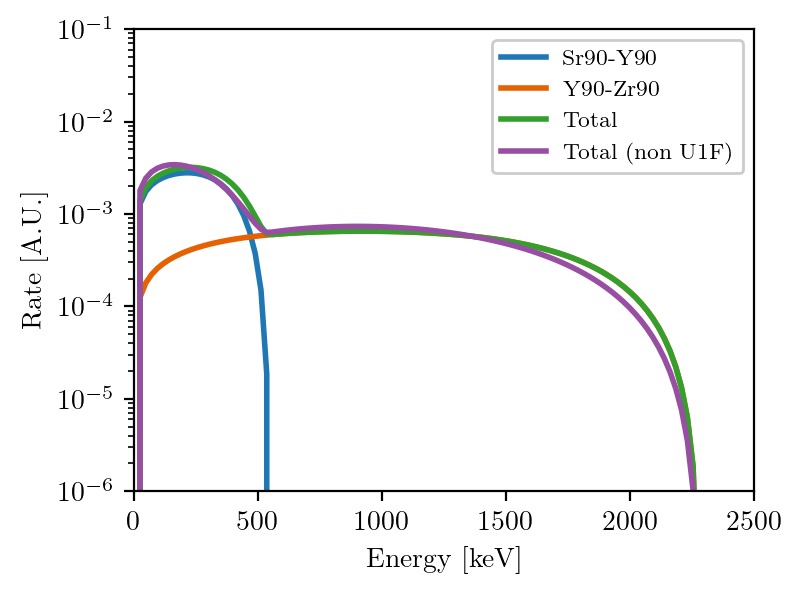

In [4]:
energy = np.linspace(0, 2300, 100)
norm_sr90, _ = beta.beta_shape_norm(Q=const.Q_SR90, Z=const.Z_Y90, A=const.A_SR90, u1f=True)
norm_y90, _ = beta.beta_shape_norm(Q=const.Q_Y90, Z=const.Z_ZR90, A=const.A_SR90, u1f=True)
norm_sr90_nu1f, _ = beta.beta_shape_norm(Q=const.Q_SR90, Z=const.Z_Y90, A=const.A_SR90, u1f=False)
norm_y90_nu1f, _ = beta.beta_shape_norm(Q=const.Q_Y90, Z=const.Z_ZR90, A=const.A_SR90, u1f=False)
plt.figure(0)
plt.plot(energy, [beta.beta_shape(T=energy_, Q=const.Q_SR90, C=1/norm_sr90, Z=const.Z_Y90, A=const.A_SR90, u1f=True) for energy_ in energy], label='Sr90-Y90')
plt.plot(energy, [beta.beta_shape(T=energy_, Q=const.Q_Y90, C=1/norm_y90, Z=const.Z_ZR90, A=const.A_SR90, u1f=True) for energy_ in energy], label='Y90-Zr90')
plt.plot(energy, [beta.beta_shape(T=energy_, Q=const.Q_SR90, C=1/norm_sr90, Z=const.Z_Y90, A=const.A_SR90, u1f=True)+beta.beta_shape(T=energy_, Q=const.Q_Y90, C=1/norm_y90, Z=const.Z_ZR90, A=const.A_SR90, u1f=True) for energy_ in energy], label='Total')
plt.plot(energy, [beta.beta_shape(T=energy_, Q=const.Q_SR90, C=1/norm_sr90_nu1f, Z=const.Z_Y90, A=const.A_SR90, u1f=False)+beta.beta_shape(T=energy_, Q=const.Q_Y90, C=1/norm_y90_nu1f, Z=const.Z_ZR90, A=const.A_SR90, u1f=False) for energy_ in energy], label='Total (non U1F)')
plt.legend(loc='upper right')
plt.xlabel('Energy [keV]')
plt.ylabel('Rate [A.U.]')
plt.yscale('log')
plt.ylim(1e-6, 1e-1)

Text(0, 0.5, 'Count [$1/N_{pe}$]')

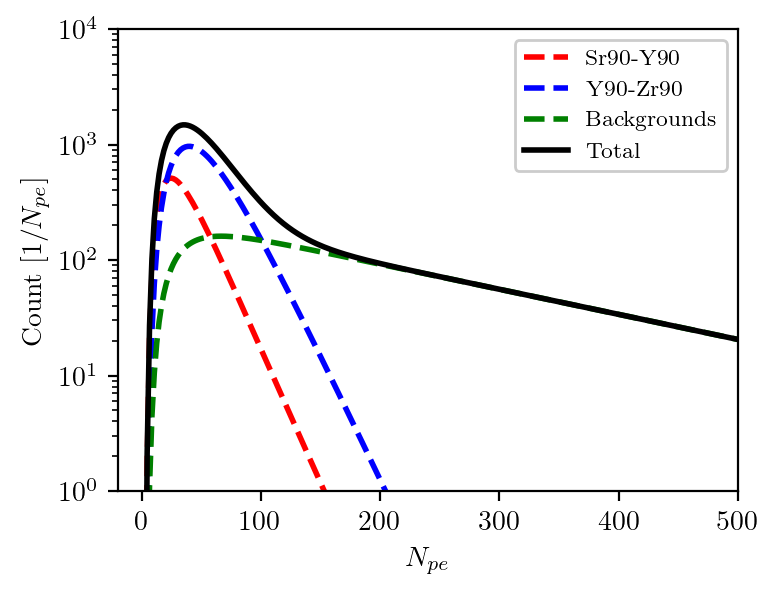

In [9]:
n_beta=2e5
n_bkg=5e4
N0_trig=30
B_trig=5
enf=10
b_bkg=0.005
lyp=15/500
npe = np.linspace(0.5, 1000, 500)
plt.figure(1)
spectra = np.array(beta.model(npe, n_beta, n_bkg, N0_trig, B_trig, enf, b_bkg, lyp))
# print(spectra.shape)
plt.plot(npe, spectra[0], 'r--', label='Sr90-Y90')
plt.plot(npe, spectra[1], 'b--', label='Y90-Zr90')
plt.plot(npe, spectra[2], 'g--', label='Backgrounds')
plt.plot(npe, spectra[3], 'k-', label='Total')
plt.legend(loc='upper right')
plt.yscale('log')
plt.ylim(1e0, 1e4)
plt.xlim(-20, 500)
plt.xlabel(r'$N_{pe}$')
plt.ylabel(r'Count [$1/N_{pe}$]')

# Scintillation data top 1006

## Directory

In [10]:
dir1006 = "/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/"
subdir1006 = ["2022-10-06/2022-10-06_volt:65_pos:top_light:scint_cond:prepurification/",
              "2022-10-06/2022-10-06_volt:65_pos:top_light:scint_cond:postpurification_1/",
              "2022-10-06/2022-10-06_volt:65_pos:top_light:scint_cond:postpurification_2/",
              "2022-10-06/2022-10-06_volt:65_pos:top_light:scint_cond:postpurification_3/"]
dscrp1006 = ["pre","post1","post2","post3"]

In [11]:
ds1006 = []
for i,subdir in enumerate(subdir1006[:1]):
    print(dscrp1006[i])
    path = "{}{}".format(dir1006, subdir)
    data = ds.Dataset(path, pol=-1, channels=range(4), spe=[517.9075724034741, 519.5815671469427, 524.1075333155493, 508.98003331053644])    
    for ch in range(4):
        data.ch[ch].read_data()
        data.ch[ch].baseline_subtraction()
        data.ch[ch].get_avgwf()
        data.ch[ch].get_integral(prompt=0.1, long=5)
        data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    ds1006.append(data)

pre


## $f_{\rm prompt}$ distribution
Prompt integral = $0.1~\rm{\mu s}$ integrated charge
Total integral = $5~\rm{\mu s}$ integrated charge

Text(0, 0.5, '$f_{\\rm prompt}$')

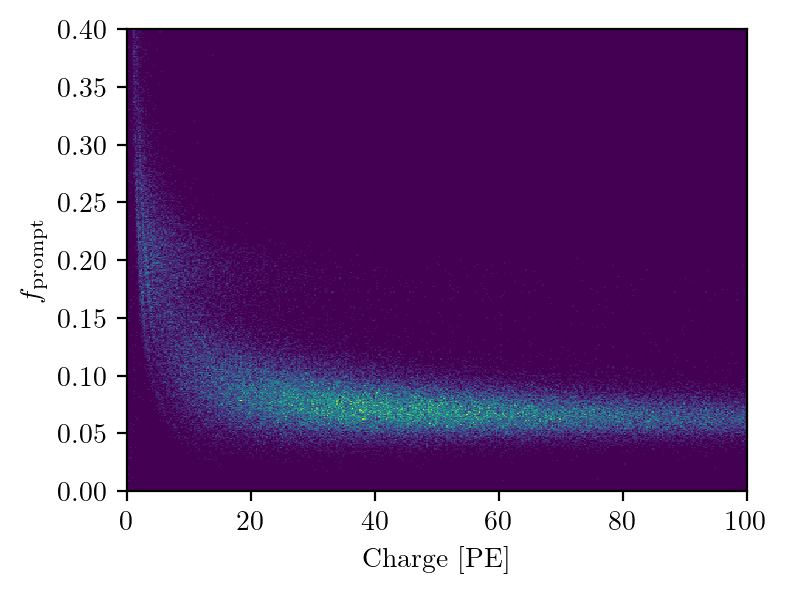

In [37]:
plt.figure(0)
dset = ds1006[0]
plt.hist2d(dset.summed_integral_pe, dset.fprompt, bins=[400,400], range=[[0,100],[0,0.4]])
plt.xlabel('Charge [PE]')
plt.ylabel(r'$f_{\rm prompt}$')

## Spectrum of $5~\rm{\mu s}$ integrated charge

[2.22766057e+05 7.53362105e+04 3.14447259e+01 1.19347320e+01
 1.16218833e+01 8.33319700e-03 3.46580978e-02]


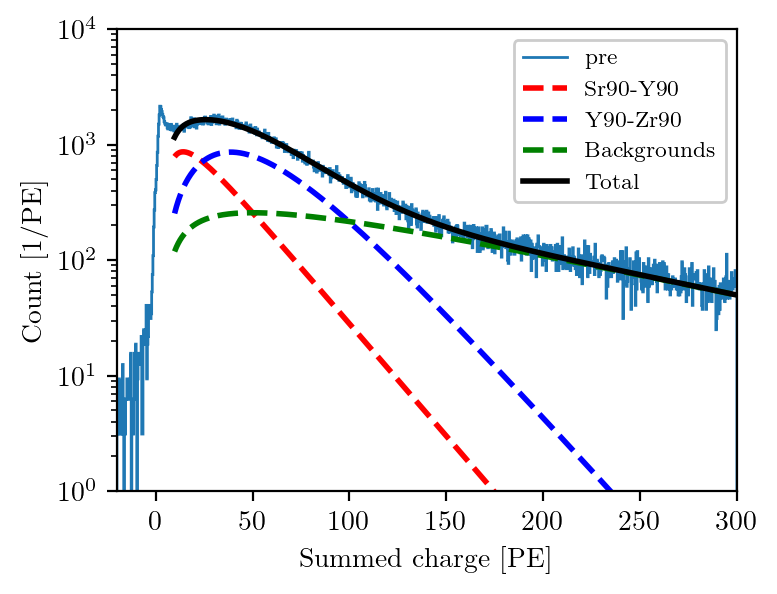

In [32]:
#binning
xmin = -20
xmax = 300
nbins = 1000
binw = (xmax-xmin)/nbins
thre_pe = 10
thre = int((thre_pe-xmin)/binw)
#initial parameters
n_beta=2.27e5
n_bkg=7.70e4
N0_trig=32.5
B_trig=12.2
enf=11.4
b_bkg=0.00826
lyp=0.0347
#plot
plt.figure()
for i,dset in enumerate(ds1006[:1]):
    hist, hist_bin = np.histogram(dset.summed_integral_pe, bins=nbins, range=(xmin,xmax))
    plt.stairs(hist/binw, hist_bin, label=dscrp1006[i])
    popt,pcov=curve_fit(beta.model_total, hist_bin[thre:-1], hist[thre:]/binw, p0=[n_beta, n_bkg, N0_trig, B_trig, enf, b_bkg, lyp], sigma=np.sqrt(hist[thre:])/binw, maxfev=10000)
    print(popt)
    spectra = np.array(beta.model(hist_bin[thre:], *popt))
    # spectra = np.array(beta.model(hist_bin, n_beta, n_bkg, N0_trig, B_trig, enf, b_bkg, lyp))
    plt.plot(hist_bin[thre:], spectra[0], 'r--', label='Sr90-Y90')
    plt.plot(hist_bin[thre:], spectra[1], 'b--', label='Y90-Zr90')
    plt.plot(hist_bin[thre:], spectra[2], 'g--', label='Backgrounds')
    plt.plot(hist_bin[thre:], spectra[3], 'k-', label='Total')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e0,1e4)
plt.xlabel('Summed charge [PE]')
plt.ylabel('Count [1/PE]')
plt.show()

## Triplet lifetime

ch0 A_S=324.692+/-4.454  TAU_S=0.0444+/-0.0007us  A_T=43.043+/-0.252  TAU_T=1.1141+/-0.0066us
ch1 A_S=291.238+/-3.089  TAU_S=0.0555+/-0.0007us  A_T=42.492+/-0.266  TAU_T=1.1898+/-0.0073us
ch2 A_S=299.662+/-3.177  TAU_S=0.0485+/-0.0006us  A_T=40.446+/-0.197  TAU_T=1.2010+/-0.0059us
ch3 A_S=270.779+/-2.746  TAU_S=0.0579+/-0.0007us  A_T=36.423+/-0.233  TAU_T=1.2124+/-0.0075us
ch0 A_S=322.887+/-4.377  TAU_S=0.0446+/-0.0007us  A_T=42.733+/-0.247  TAU_T=1.1232+/-0.0066us
ch1 A_S=288.314+/-3.030  TAU_S=0.0560+/-0.0007us  A_T=41.891+/-0.260  TAU_T=1.2074+/-0.0073us
ch2 A_S=298.164+/-3.135  TAU_S=0.0487+/-0.0006us  A_T=40.048+/-0.193  TAU_T=1.2200+/-0.0060us
ch3 A_S=269.831+/-2.730  TAU_S=0.0578+/-0.0007us  A_T=36.184+/-0.228  TAU_T=1.2249+/-0.0075us
ch0 A_S=326.452+/-4.378  TAU_S=0.0445+/-0.0007us  A_T=43.131+/-0.241  TAU_T=1.1488+/-0.0065us
ch1 A_S=291.265+/-3.057  TAU_S=0.0560+/-0.0007us  A_T=42.472+/-0.258  TAU_T=1.2289+/-0.0073us
ch2 A_S=300.603+/-3.171  TAU_S=0.0485+/-0.0006us  A_T=40.754

([<matplotlib.axis.XTick at 0x14afa4174610>,
 [Text(0, 0, 'pre'),
  Text(1, 0, 'post1'),
  Text(2, 0, 'post2'),
  Text(3, 0, 'post3')])

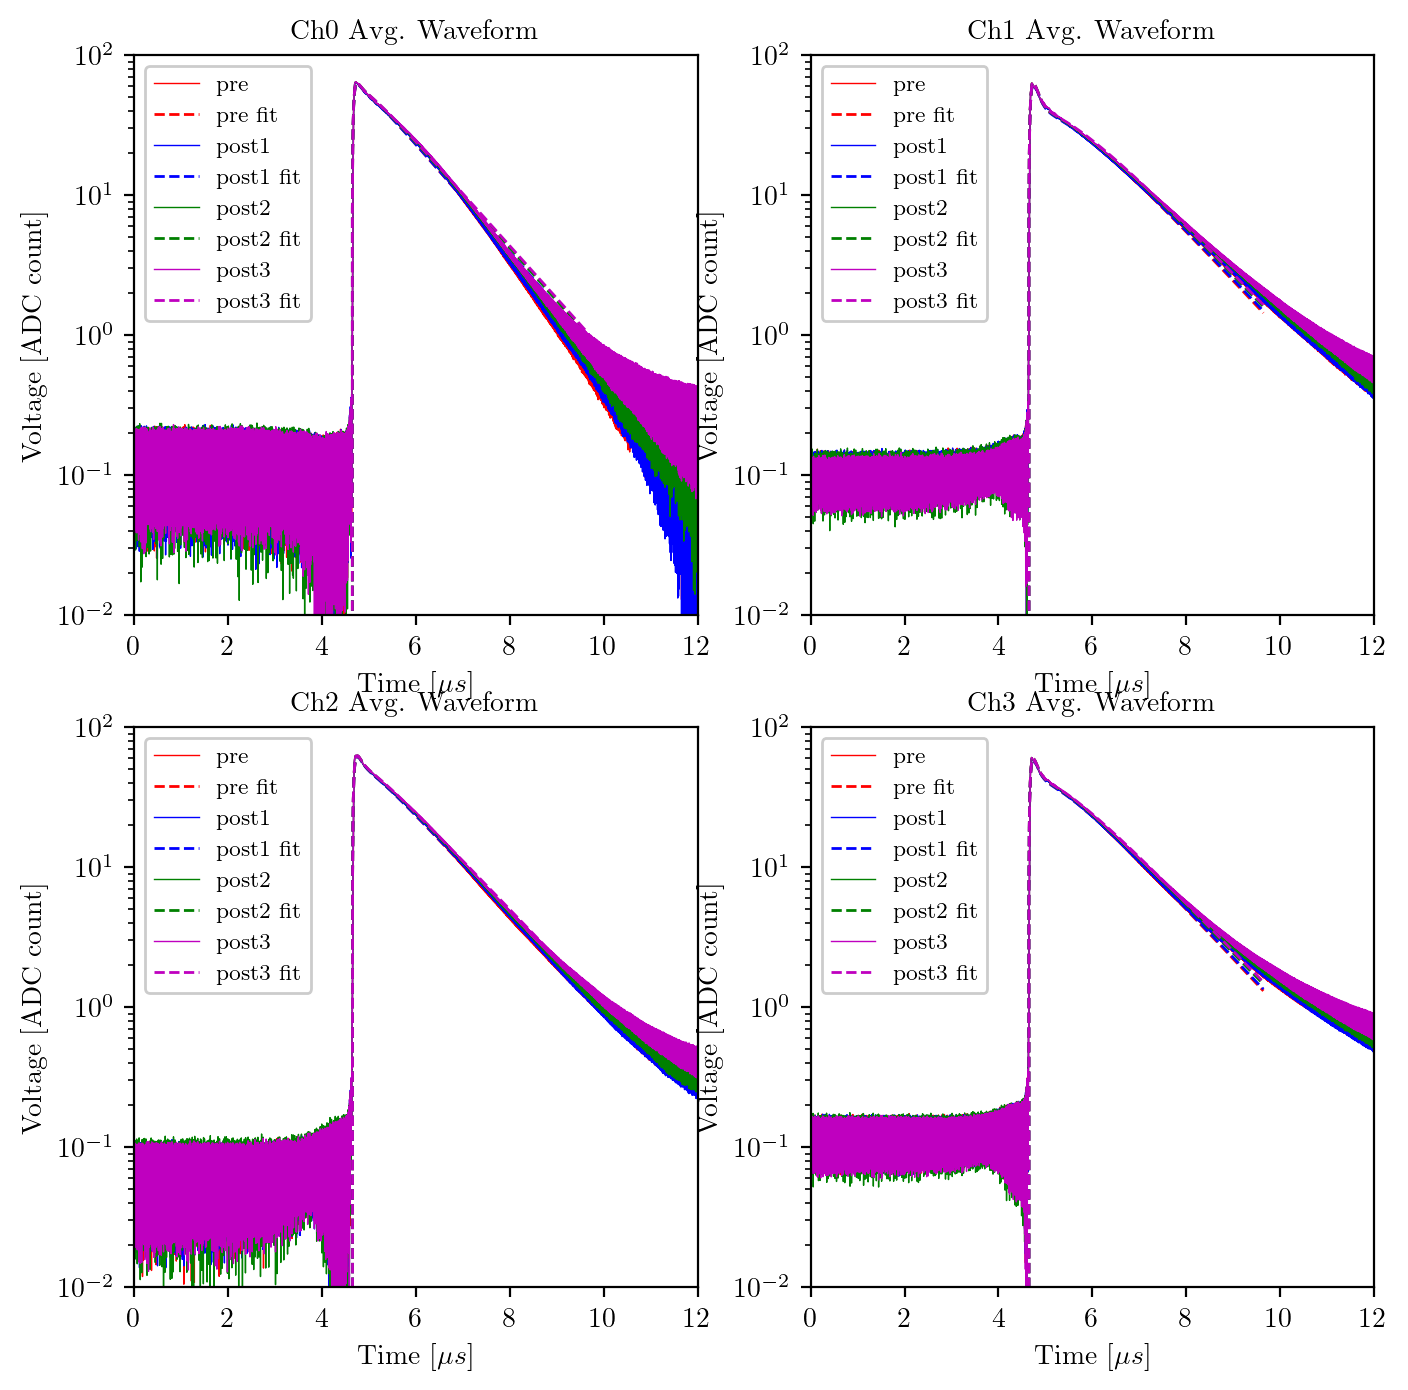

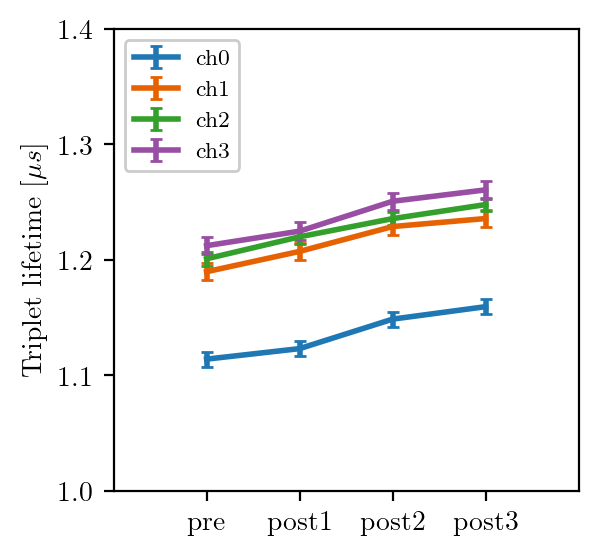

In [6]:
plt.figure(0,figsize=(8,8))
colors = ['r','b','g','m']
A1 = [2.350, 4.464, 2.919, 4.302]
TAU1 = [0.05331, 0.09480, 0.06779, 0.07185]
A2 = [3.412, 1.193, 2.925, 1.794]
TAU2 = [0.34460, 0.67362, 0.37612, 0.56386]

for i,dset in enumerate(ds1006):
    for ch in range(4):
        dset.ch[ch].set_pulse_pars(a1=A1[ch], tau1=TAU1[ch], a2=A2[ch], tau2=TAU2[ch])
        plt.subplot(2,2,ch+1)
        plt.plot(dset.ch[ch].time, abs(dset.ch[ch].avgwf), "{}-".format(colors[i]), label=dscrp1006[i], linewidth=0.5)      
        t0 = dset.ch[ch].trigger_position
        length = int(5/dset.ch[ch].sample_step)
        err = np.std(dset.ch[ch].avgwf[:t0])
        popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], abs(dset.ch[ch].avgwf[t0:t0+length]), p0=[300, 0.05, 40, 1.2], sigma=[err]*length, maxfev=10000)
        print('ch{} A_S={:.3f}+/-{:.3f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.3f}+/-{:.3f}  TAU_T={:.4f}+/-{:.4f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3])))
        dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
        dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
        plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "{}--".format(colors[i]), label='{} fit'.format(dscrp1006[i]), linewidth=1)
        
for ch in range(4):
    plt.subplot(2,2,ch+1)
    plt.title('Ch{} Avg. Waveform'.format(ch))
    plt.ylabel('Voltage [ADC count]')
    plt.xlabel(r'Time [$\mu s$]')
    plt.legend()
    plt.xlim(0,12)
    plt.ylim(1e-2, 100)
    plt.yscale('log')

plt.figure(1, figsize=(3,3))
for ch in range(4):
    plt.errorbar(np.arange(4), [dset.ch[ch].tau_triplet[0] for dset in ds1006], yerr=[dset.ch[ch].tau_triplet[1] for dset in ds1006], label='ch{}'.format(ch))
plt.xlim(-1, 4)
plt.ylim(1, 1.4)
plt.legend()
plt.ylabel(r'Triplet lifetime [$\mu s$]')
plt.xticks(np.arange(4),labels=dscrp1006)

# Scintillation data bottom 1107

In [2]:
# dir1007 = "/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-10-07/"
# subdir1007 = ["2022-10-07_volt_65_pos_top_light_scint_coinc_111",
#               "2022-10-07_volt_67_pos_top_light_scint_coinc_111",
#               "2022-10-07_volt_69_pos_top_light_scint_coinc_111",
#               "2022-10-07_volt_71_pos_top_light_scint_coinc_111",
#               "2022-10-07_volt_73_pos_top_light_scint_coinc_111",
#               "2022-10-07_volt_75_pos_top_light_scint_coinc_111"]
# dscrp1007 = ["65V", "67V", "69V", "71V", "73V", "75V"]
# bias = [65, 67, 69, 71, 73, 75]

# dir1104_bg = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-04/2022-11-04_volt_70_pos_bottom_light_scintillation_coinc_111_cond_no_gamma'
# dir1104_cs = '/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-04/2022-11-04_volt_70_pos_bottom_light_scintillation_coinc_111_cond_with_gamma'

dir1107_bkg = []
dir1107_gamma = []
for i in range(5):
    dir1107_bkg.append('/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_{}'.format(i+1))
    dir1107_gamma.append('/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_with_gamma_purification_{}'.format(i+1))


In [57]:
import numpy as np
file = dir1104_bg+'/0/wave1.dat'
binary = np.fromfile(file, dtype=np.dtype('i4'), count=6)
print(binary)

[   8024       0       0       1      10 6895923]


In [5]:
ds1107_bkg = []
ds1107_gamma = []
for i,subdir in enumerate(dir1107_bkg+dir1107_gamma):
    data = ds.Dataset('', pol=-1, channels=range(4), spe=[518.84503, 510.84132, 504.40531, 457.59589])
    for j in range(10):
        data.path = "{}/{}/".format(subdir, j)
        print(data.path)
        if j<=6 or i!=4:
            for ch in range(4):
                data.ch[ch].path = data.path
                data.ch[ch].read_data()
                data.ch[ch].baseline_subtraction()
                data.ch[ch].get_avgwf()
                data.ch[ch].get_integral(prompt=0.5, long=5)
                data.ch[ch].clear()
    data.get_summed_integral_pe()
    data.get_fprompt()
    if i<len(dir1107_bkg):
        ds1107_bkg.append(data)
    else:
        ds1107_gamma.append(data)

/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/0/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/1/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/2/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/3/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/4/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_volt_65_pos_bottom_light_scintillation_coinc_111_cond_no_gamma_purification_1/5/
/scratch/gpfs/GALBIATI/data/sipm/reflector_studies/2022-11-07/2022-11-07_vol

In [6]:
print(ds1107_bkg[0].ch[0].cumulative_time, ds1107_gamma[0].ch[0].cumulative_time)

782.6389694080005 158.560913456


0.002525912 17.14225284
0.0065001040000000005 17.17281596
0.0022476880000000003 17.172477352
0.004470408 17.158121352000002
0.003055912 17.174519288000003
0.051452536 0.278888904
0.0016116400000000001 17.178980664
0.0064075600000000005 17.172995064000002
0.002321304 17.175240776000003
0.007726248000000001 17.172209224
0.004277896000000001 17.178394856
0.06829549600000001 1.46762644
0.004855 17.177855432
0.0043194800000000005 17.147104936
0.0026543120000000003 17.16310044
0.000678264 17.163446088
0.017165864 17.165890440000002
0.06950812 0.111360152
0.014635944000000001 17.160005064
0.0027526480000000003 17.172229624
0.018381368000000002 17.17623404
0.009379016 17.171707368
0.01516108 17.171737576
0.053112328 1.13731548
0.014515896 17.160530696000002
0.022721592000000002 17.176588584
0.008474856000000001 17.177301688
0.009334072 17.160226408
0.007584872 17.15618404
0.054608104000000005 3.170484328
0.00535924 17.179187688000003
0.02020204 17.16943972
0.012007432 17.177885336000003
0.0046

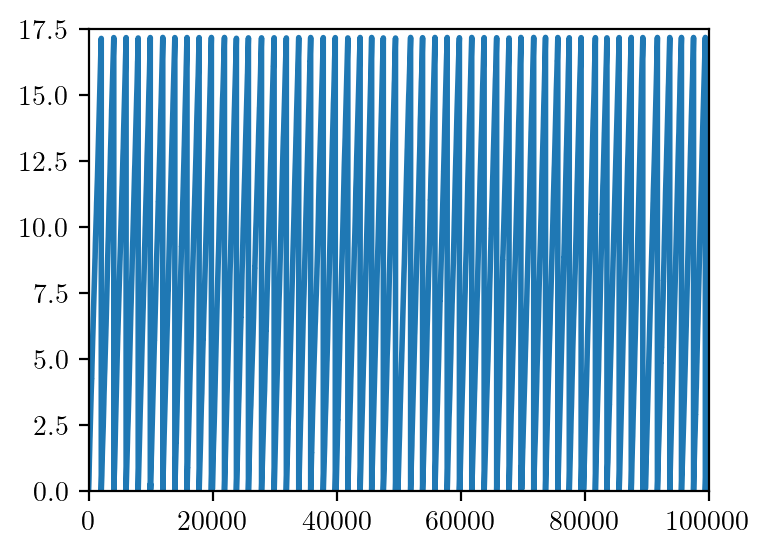

In [4]:
ts_array = np.array(ds1104[0].ch[0].timestamp)
plt.plot(ts_array)
for i,ts in enumerate(ts_array):
    if i>0 and ts<ts_array[i-1]:
        print(ts,ts_array[i-1])


## $f_{\rm prompt}$ distribution
Prompt integral = $0.5~\rm{\mu s}$ integrated charge
Total integral = $5~\rm{\mu s}$ integrated charge

Text(0.5, 0.98, 'Cs-137 + Backgrounds')

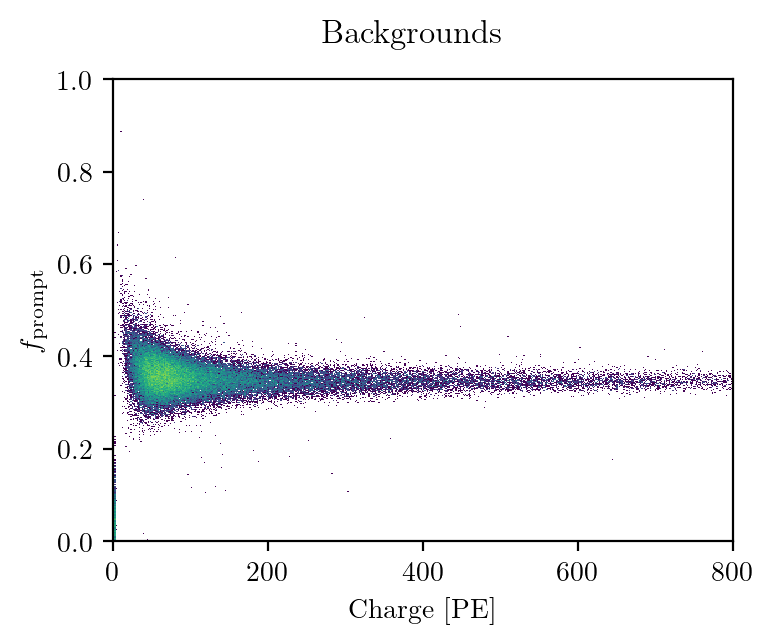

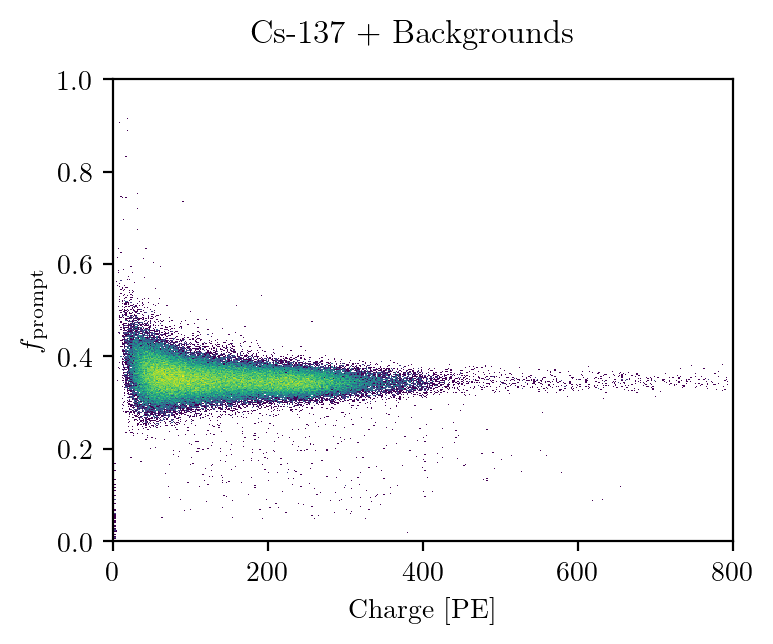

In [7]:
import matplotlib.colors as colors
plt.figure(0)
dset = ds1107_bkg[0]
plt.hist2d(dset.summed_integral_pe, dset.fprompt, bins=[500,500], range=[[0,800],[0,1]], norm = colors.LogNorm())
plt.xlabel('Charge [PE]')
plt.ylabel(r'$f_{\rm prompt}$')
plt.suptitle('Backgrounds')
plt.figure(1)
dset = ds1107_gamma[0]
plt.hist2d(dset.summed_integral_pe, dset.fprompt, bins=[500,500], range=[[0,800],[0,1]], norm = colors.LogNorm())
plt.xlabel('Charge [PE]')
plt.ylabel(r'$f_{\rm prompt}$')
plt.suptitle('Cs-137 + Backgrounds')

## Spectrum of $5~\rm{\mu s}$ integrated charge

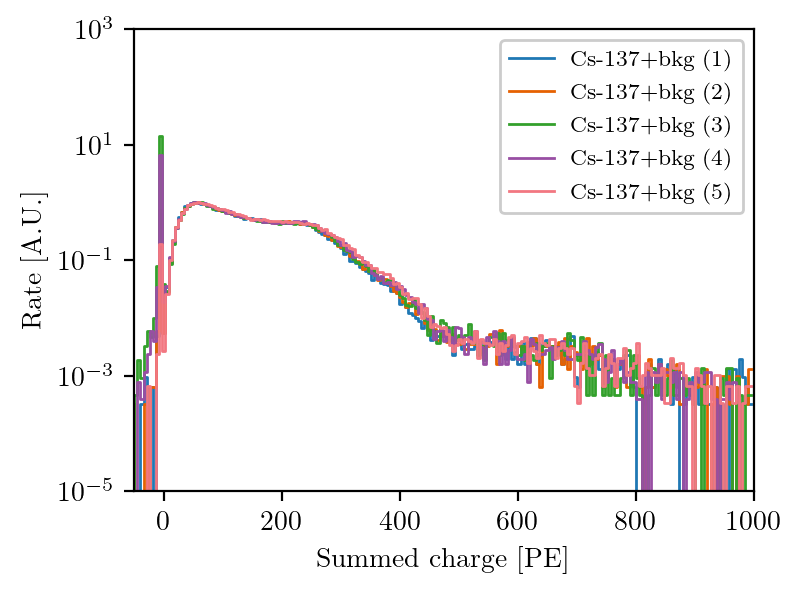

In [11]:
xmin = -50
xmax = 1000
nbins = 200
bin_width = (xmax-xmin)/nbins
labels = []
for i in range(len(ds1107_gamma)):
    labels.append('Cs-137+bkg ({})'.format(i+1))
plt.figure()
hist = []
for i in range(len(ds1107_gamma)):
    ds = ds1107_gamma[i]
    h,hx = np.histogram(ds.summed_integral_pe, bins=np.linspace(xmin,xmax,nbins))
    h = h/np.max(h[20:])
    #h = h/ds.ch[0].cumulative_time/bin_width
    hist.append(h)
    plt.step(hx[:-1], h, label=labels[i], linewidth=1)
# plt.step(hx[:-1], hist[1]-hist[0], label='difference', linewidth=1)
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlim(xmin, xmax)
plt.ylim(1e-5, 1e3)
plt.xlabel('Summed charge [PE]')
plt.ylabel('Rate [A.U.]')
plt.show()

## Triplet lifetime

ch0 A_S=293.393+/-3.478  TAU_S=0.0632+/-0.0010us  A_T=38.629+/-0.476  TAU_T=0.8433+/-0.0088us
ch1 A_S=335.249+/-3.299  TAU_S=0.0894+/-0.0012us  A_T=33.925+/-0.514  TAU_T=1.3804+/-0.0198us
ch2 A_S=325.727+/-3.350  TAU_S=0.0825+/-0.0012us  A_T=35.971+/-0.518  TAU_T=1.1649+/-0.0147us
ch3 A_S=261.943+/-2.459  TAU_S=0.0877+/-0.0011us  A_T=26.379+/-0.341  TAU_T=1.6468+/-0.0220us


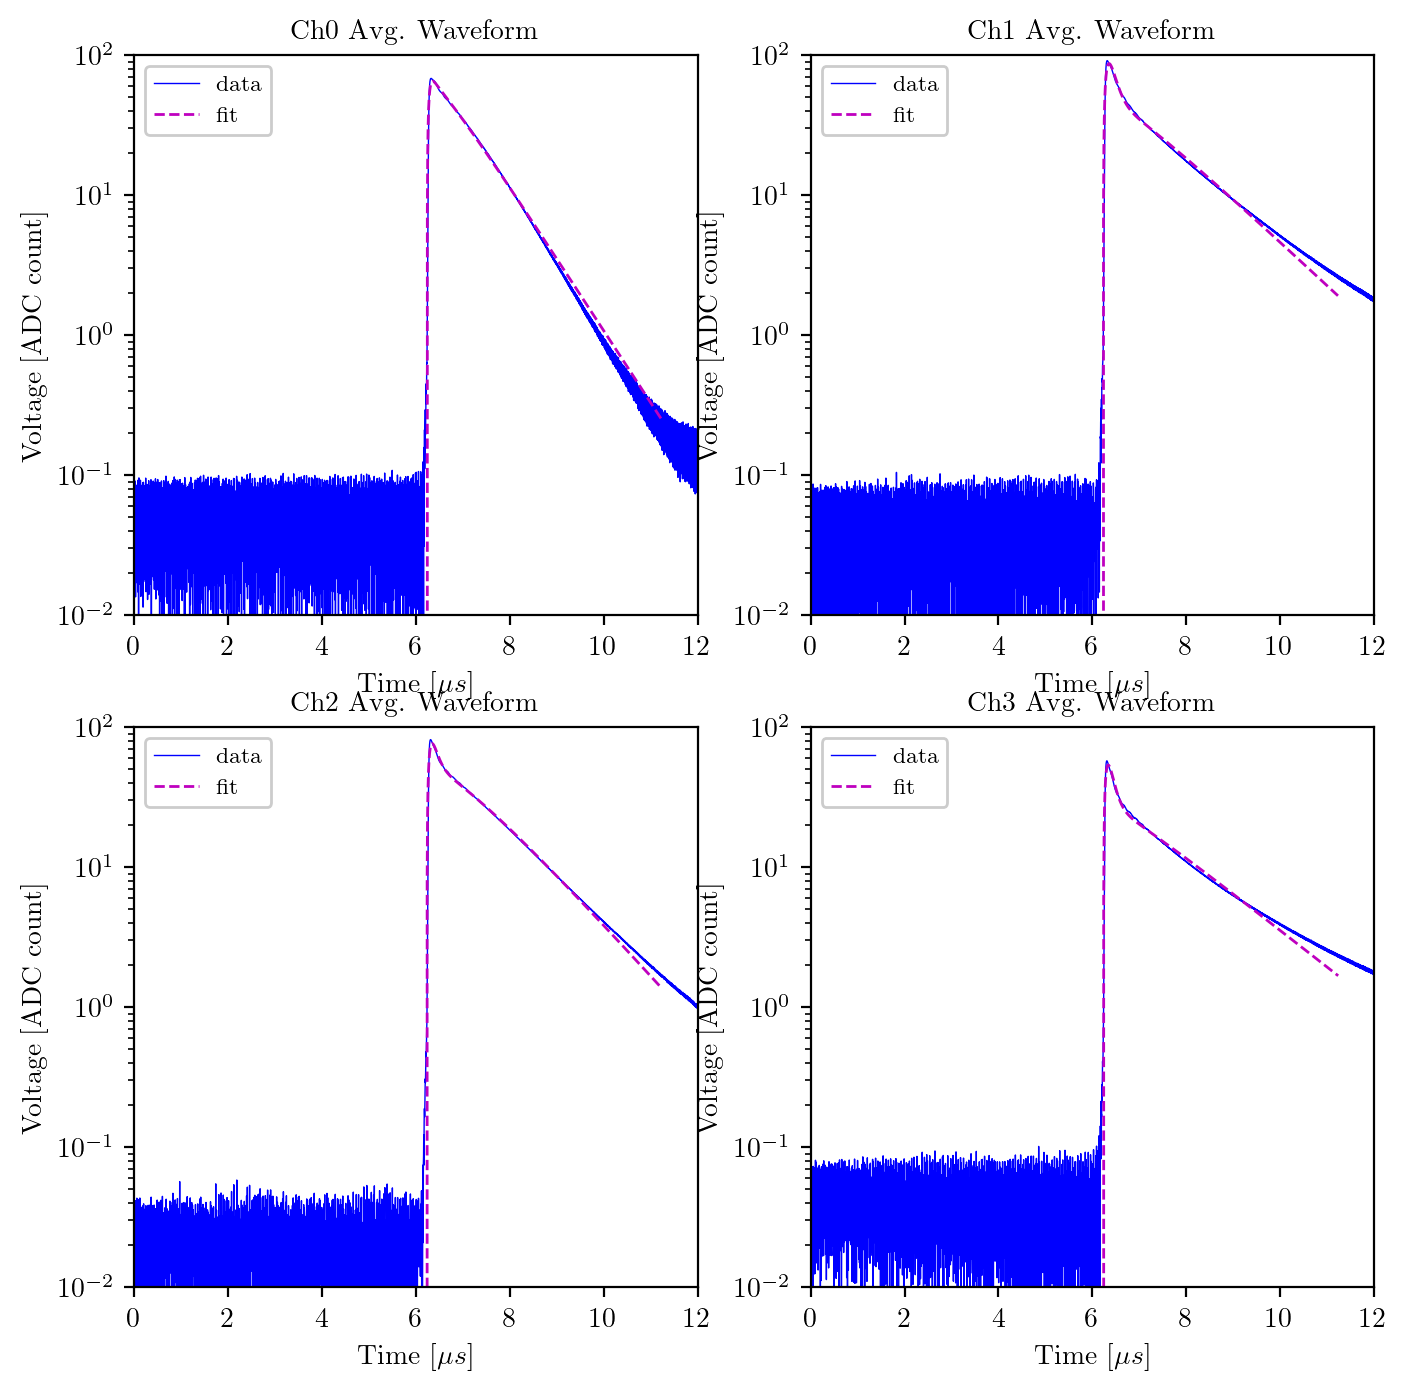

In [12]:
plt.figure(0,figsize=(8,8))
colors = ['r','b','g','m']
A1 = [2.87034549074171, 4.56530440419285, 4.34100691988196, 4.6130995887607]
TAU1 = [0.0444273100352291, 0.101583182633407, 0.07246236377296, 0.0718649983147296]
A2 = [3.02004825336753, 1.03860477405824, 1.42205954757012, 0.783024106669865]
TAU2 = [0.39793842757296, 0.733531780706409, 0.702539511527978, 0.710143874389766]

dset = ds1107_gamma[0]
for ch in range(4):
    dset.ch[ch].set_pulse_pars(a1=A1[ch], tau1=TAU1[ch], a2=A2[ch], tau2=TAU2[ch])
    plt.subplot(2,2,ch+1)
    plt.plot(dset.ch[ch].time, abs(dset.ch[ch].avgwf), "b-", label='data', linewidth=0.5)      
    t0 = dset.ch[ch].trigger_position
    length = int(5/dset.ch[ch].sample_step)
    err = np.std(dset.ch[ch].avgwf[:t0])
    popt,pcov = curve_fit(dset.ch[ch].get_scintillation, dset.ch[ch].time[t0:t0+length], abs(dset.ch[ch].avgwf[t0:t0+length]), p0=[300, 0.05, 40, 1.2], sigma=[err]*length, maxfev=10000)
    print('ch{} A_S={:.3f}+/-{:.3f}  TAU_S={:.4f}+/-{:.4f}us  A_T={:.3f}+/-{:.3f}  TAU_T={:.4f}+/-{:.4f}us'.format(ch,popt[0],np.sqrt(pcov[0,0]),popt[1],np.sqrt(pcov[1,1]),popt[2],np.sqrt(pcov[2,2]),popt[3],np.sqrt(pcov[3,3])))
    dset.ch[ch].tau_singlet = [popt[1], np.sqrt(pcov[1,1])]
    dset.ch[ch].tau_triplet = [popt[3], np.sqrt(pcov[3,3])]
    plt.plot(dset.ch[ch].time[t0:t0+length], dset.ch[ch].get_scintillation(dset.ch[ch].time[t0:t0+length], *popt), "m--", label='fit', linewidth=1.0)
    
for ch in range(4):
    plt.subplot(2,2,ch+1)
    plt.title('Ch{} Avg. Waveform'.format(ch))
    plt.ylabel('Voltage [ADC count]')
    plt.xlabel(r'Time [$\mu s$]')
    plt.legend()
    plt.xlim(0,12)
    plt.ylim(1e-2, 100)
    plt.yscale('log')

# plt.figure(1, figsize=(3,3))
# for ch in range(4):
#     plt.errorbar(np.arange(5), [dset_.ch[ch].tau_triplet[0] for dset_ in ds1006]+[dset.ch[ch].tau_triplet[0]], yerr=[dset_.ch[ch].tau_triplet[1] for dset_ in ds1006]+[dset.ch[ch].tau_triplet[1]], label='ch{}'.format(ch))
# plt.xlim(-1, 5)
# plt.ylim(1, 1.7)
# plt.legend()
# plt.ylabel(r'Triplet lifetime [$\mu s$]')
# plt.xticks(np.arange(5),labels=dscrp1006+['10-07'])